# Visualisation 1: Width along several runner hyphea

# Information

The goal of this notebook is to examine the variation of width alongside runner hyphea.

WARNING: The coordinates are in the joystick setting (which is in micrometers)\
WARNING: Hypha 1 tip is not a real tip\

NB: The hypha number are the same as in notebook

**Presentation**

Plate 907\
Strain: A5\
Treatment: 100C\
Crossing date: ?\
Imaging date: 24/03\
Crossing date: 22/03 ?\


# Setup

## Imports

In [124]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import os
import numpy as np
import math

from amftrack.util.sys import storage_path
from amftrack.util.image_analysis import convert_to_micrometer

## Fetch data

In [3]:
path = os.path.join(storage_path, "width1/measures/data_width_907_3.json")

with open(path) as f:
    d = json.load(f)

for key in d.keys():
    del d[key]["values"]

df = pd.DataFrame(d)
df = df.transpose()

# Visualisation

In [119]:
df

,plate,hypha,pos,order,x,y,value,variance,std_deviation
trunk_001,20220324_Plate907_001,1,middle,9,68260,54300,244,20,4
trunk_002,20220324_Plate907_003,1,middle,8,68540,51840,243,253,15
trunk_003,20220324_Plate907_005,1,middle,7,68420,49340,209,72,8
trunk_004,20220324_Plate907_007,1,top,6,68640,46880,177,92,9
trunk_005,20220324_Plate907_007,1,bottom,5,68640,46880,205,225,15
trunk_006,20220324_Plate907_009,1,middle,4,69220,44380,190,72,8
trunk_007,20220324_Plate907_011,1,top,3,70020,41880,194,4,2
trunk_008,20220324_Plate907_011,1,bottom,2,70020,41880,191,64,8
trunk_009,20220324_Plate907_013,1,top,1,71020,39440,195,11,3
trunk_010,20220324_Plate907_013,1,bottom,0,71020,39440,194,16,4


## Plot a hypha

In [122]:
def plot_hypha(i):
    df_hypha = df[df["hypha"] == i]
    # Tip coordinates
    tip = df[(df["hypha"] == i) & (df["order"] == 0)]
    x_t, y_t = int(tip["x"]), int(tip["y"])
    # print(f"The tip of this hypha is: {int(x_t)}, {int(y_t)}")
    x = df_hypha["order"]
    y = convert_to_micrometer(df_hypha["value"], magnification=100)
    x_pos = df_hypha["x"] - x_t
    y_pos = df_hypha["y"] - y_t
    d = (x_pos**2 + y_pos**2).apply(lambda x: math.sqrt(x) / 1000)
    ax = plt.gca()
    ax.set_ylim([0, 10])
    plt.ylabel("Width (in microns)")
    plt.xlabel("Distance to the tip (in mm)")
    # dy = [0.42] * len(x)
    # plt.errorbar(d, y, dy, marker = 'x')
    plt.plot(d, y, marker="x")

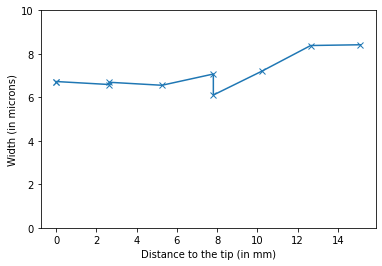

In [123]:
plot_hypha(1)

## Plot all hyphea

<IPython.core.display.Javascript object>


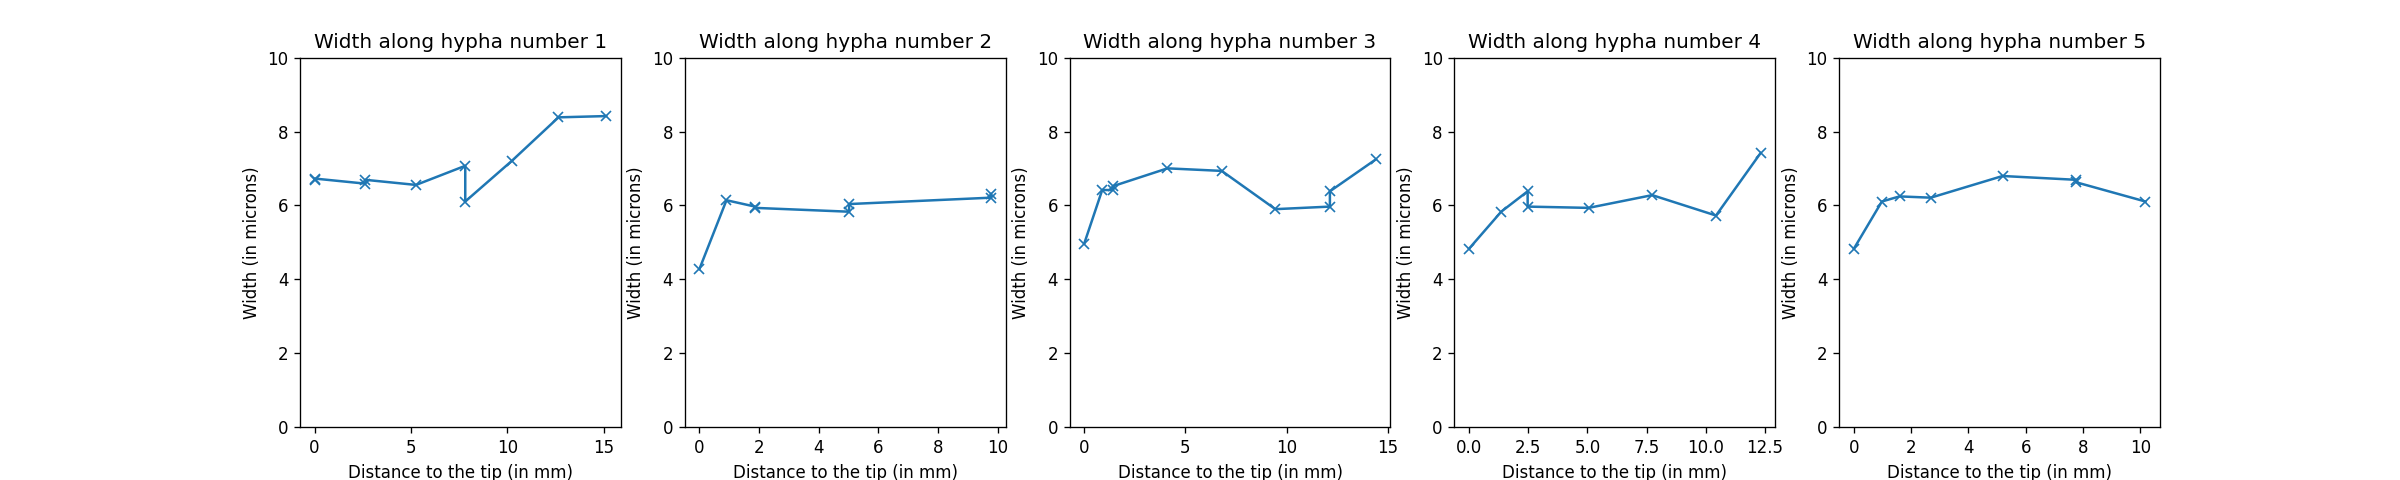

In [131]:
%matplotlib notebook
fig = plt.figure(figsize=(20, 4))
for i in range(1, 6):
    plt.subplot(1, 5, i)
    plot_hypha(i)
    plt.title(f"Width along hypha number {i}")

## Plot data points

In [9]:
def plot_geometry(i):
    """
    Plot the point where the measure were done in space
    The tip of the hypha has a red dot.
    """
    df_hypha = df[df["hypha"] == i]
    x = df_hypha["x"]
    y = -df_hypha["y"]  # y is inversed in the microscope referential
    plt.plot(x, y, marker="x")
    tip = df_hypha[df_hypha["order"] == 0]
    plt.plot(tip["x"], -tip["y"], color="red", marker="o")
    plt.title(f"Hypha {df_hypha['hypha'].iloc[0]}")

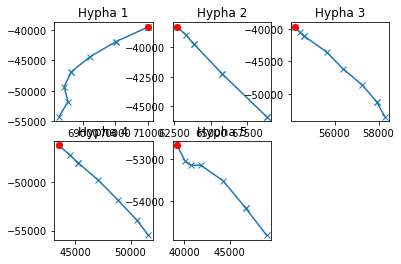

In [10]:
for i in range(1, 6):
    plt.subplot(2, 3, i)
    plot_geometry(i)

## Plot datapoints together

<IPython.core.display.Javascript object>


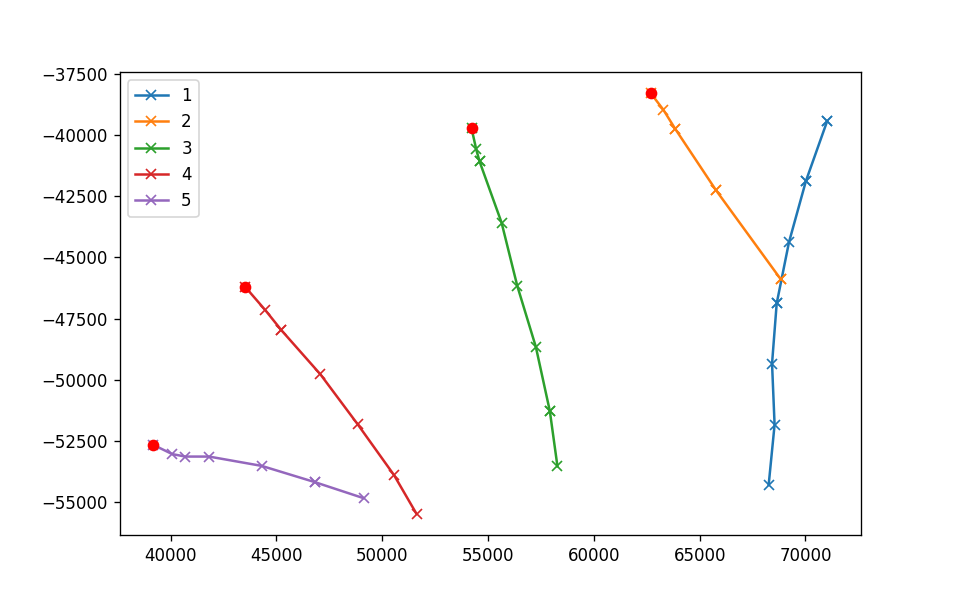

In [130]:
%matplotlib notebook
l = []
for i in range(1, 6):
    df_hypha = df[df["hypha"] == i]
    x = df_hypha["x"]
    y = -df_hypha["y"]  # y is inversed in the microscope referential
    plt.plot(x, y, marker="x", label=f"{i}")
    tip = df_hypha[df_hypha["order"] == 0]
    if i != 1:
        plt.plot(tip["x"], -tip["y"], color="red", marker="o")
plt.legend(loc="upper left")